In [ ]:
 !pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.6 MB/s 


##DATA COLLECTION

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split 
from tabulate import tabulate
from category_encoders import TargetEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option("display.max_columns", None)
df = pd.read_csv("/content/drive/MyDrive/DataCoSupplyChainDataset.csv",encoding='latin-1')
#df.head()

In [ ]:
df['order date '] = pd.to_datetime(df['order date '])
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

In [ ]:
df['order year'] = pd.DatetimeIndex(df['order date ']).year
df['order month'] = pd.DatetimeIndex(df['order date ']).month
df['order day'] = pd.DatetimeIndex(df['order date ']).day
df['Shipping year'] = pd.DatetimeIndex(df['shipping date (DateOrders)']).year
df['Shipping month'] = pd.DatetimeIndex(df['shipping date (DateOrders)']).month
df['Shipping day'] = pd.DatetimeIndex(df['shipping date (DateOrders)']).day


In [ ]:
df.shape

(180519, 59)

In [ ]:
#df.info()

##DATA PREPROCESSING





In [ ]:
#df.isnull().sum() ###identifying the null values in the dataseta

since two columns alone has most of the null values we can drop those columns and the rest of the rows containing null values are deleted


In [ ]:
df=df.drop(["Order Zipcode","Product Description"],axis=1)


In [ ]:
df=df.dropna()

In [ ]:
df.shape

(180508, 57)

In [ ]:
#df.head()

In [ ]:
df_select=df.drop(['Days for shipping (real)','Customer Email','Customer Fname','Customer Id','Customer Lname','Customer Password','CustomerStreet','Customer Zipcode','Order Customer Id','Order Id','Order Item Cardprod Id','Product Card Id','Product Image',"Delivery Status","Category Id","Order Item Id","Product Category Id","Product Status"],axis=1)
##dataframe for feature selection

In [ ]:
#df_select

In [ ]:
df=df.drop(["Delivery Status","Category Name","Customer Email","Customer Fname","Customer Lname","Customer Password","CustomerStreet","Department Name","Product Image","Product Name","Order Item Discount Rate"],axis=1)

In [ ]:
df = df[~((df["OrderStatus"] == "SUSPECTED_FRAUD") |(df["OrderStatus"] =="CANCELED"))]#delivery wont happen in these cases

In [ ]:
#df

##EXPLORATORY DATA ANALYSIS

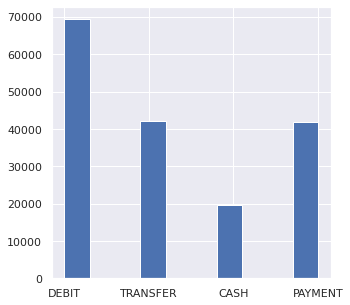

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})
df["Type"].hist()


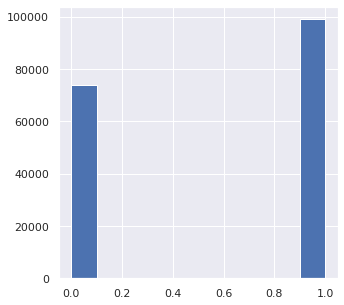

In [ ]:
df["Late_delivery_risk"].hist() ### balanced dataset

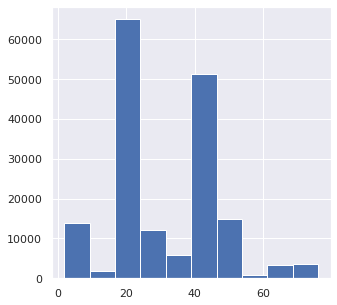

In [ ]:
df["Category Id"].hist()#????

In [ ]:
#df

In [ ]:
df["CustomerCity"].value_counts()## 562 diff customer cities

Caguas         63863
Chicago         3736
Brooklyn        3291
Los Angeles     3275
New York        1744
               ...  
Sumner            28
Bartlett          25
Ponce             22
Malden            21
Freehold          13
Name: CustomerCity, Length: 562, dtype: int64

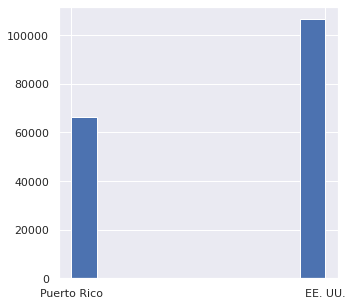

In [ ]:
df["Customer Country"].hist()

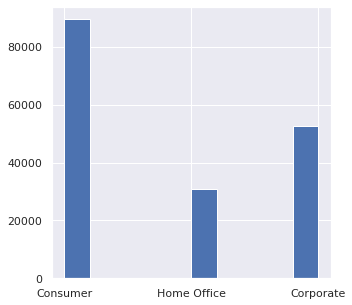

In [ ]:
df["CustomerSegment"].hist()

In [ ]:
#df["CustomerState"].value_counts()#?most prolly drop???

In [ ]:
df["Department Id"].value_counts()

7     64033
4     46876
5     31768
3     13891
6      9267
2      2374
9      1942
10     1394
11      472
8       391
12      346
Name: Department Id, dtype: int64

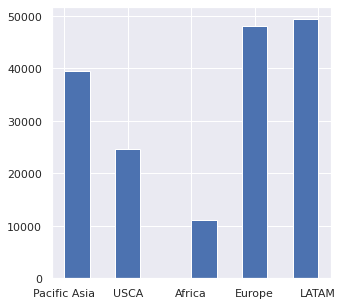

In [ ]:
df["Market"].hist()

In [ ]:
df["OrderCity"].value_counts()

Santo Domingo    2128
New York City    2121
Los Angeles      1788
Tegucigalpa      1715
Managua          1578
                 ... 
Springs             1
Arrentela           1
Koidu               1
Fort Portal         1
Junín               1
Name: OrderCity, Length: 3585, dtype: int64

In [ ]:
df["Order Country"].value_counts()

Estados Unidos       23720
Francia              12611
México               12605
Alemania              9153
Australia             8136
                     ...  
Guinea Ecuatorial        2
Kuwait                   2
Sáhara Occidental        2
Burundi                  1
Serbia                   1
Name: Order Country, Length: 164, dtype: int64

In [ ]:
df["OrderStatus"].value_counts()

COMPLETE           59487
PENDING_PAYMENT    39829
PROCESSING         21902
PENDING            20224
CLOSED             19616
ON_HOLD             9803
PAYMENT_REVIEW      1893
Name: OrderStatus, dtype: int64

In [ ]:
df["Product Status"].value_counts()

0    172754
Name: Product Status, dtype: int64

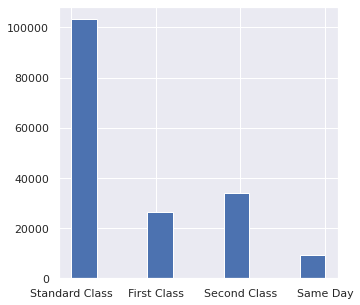

In [ ]:
df["ShippingMode"].hist()

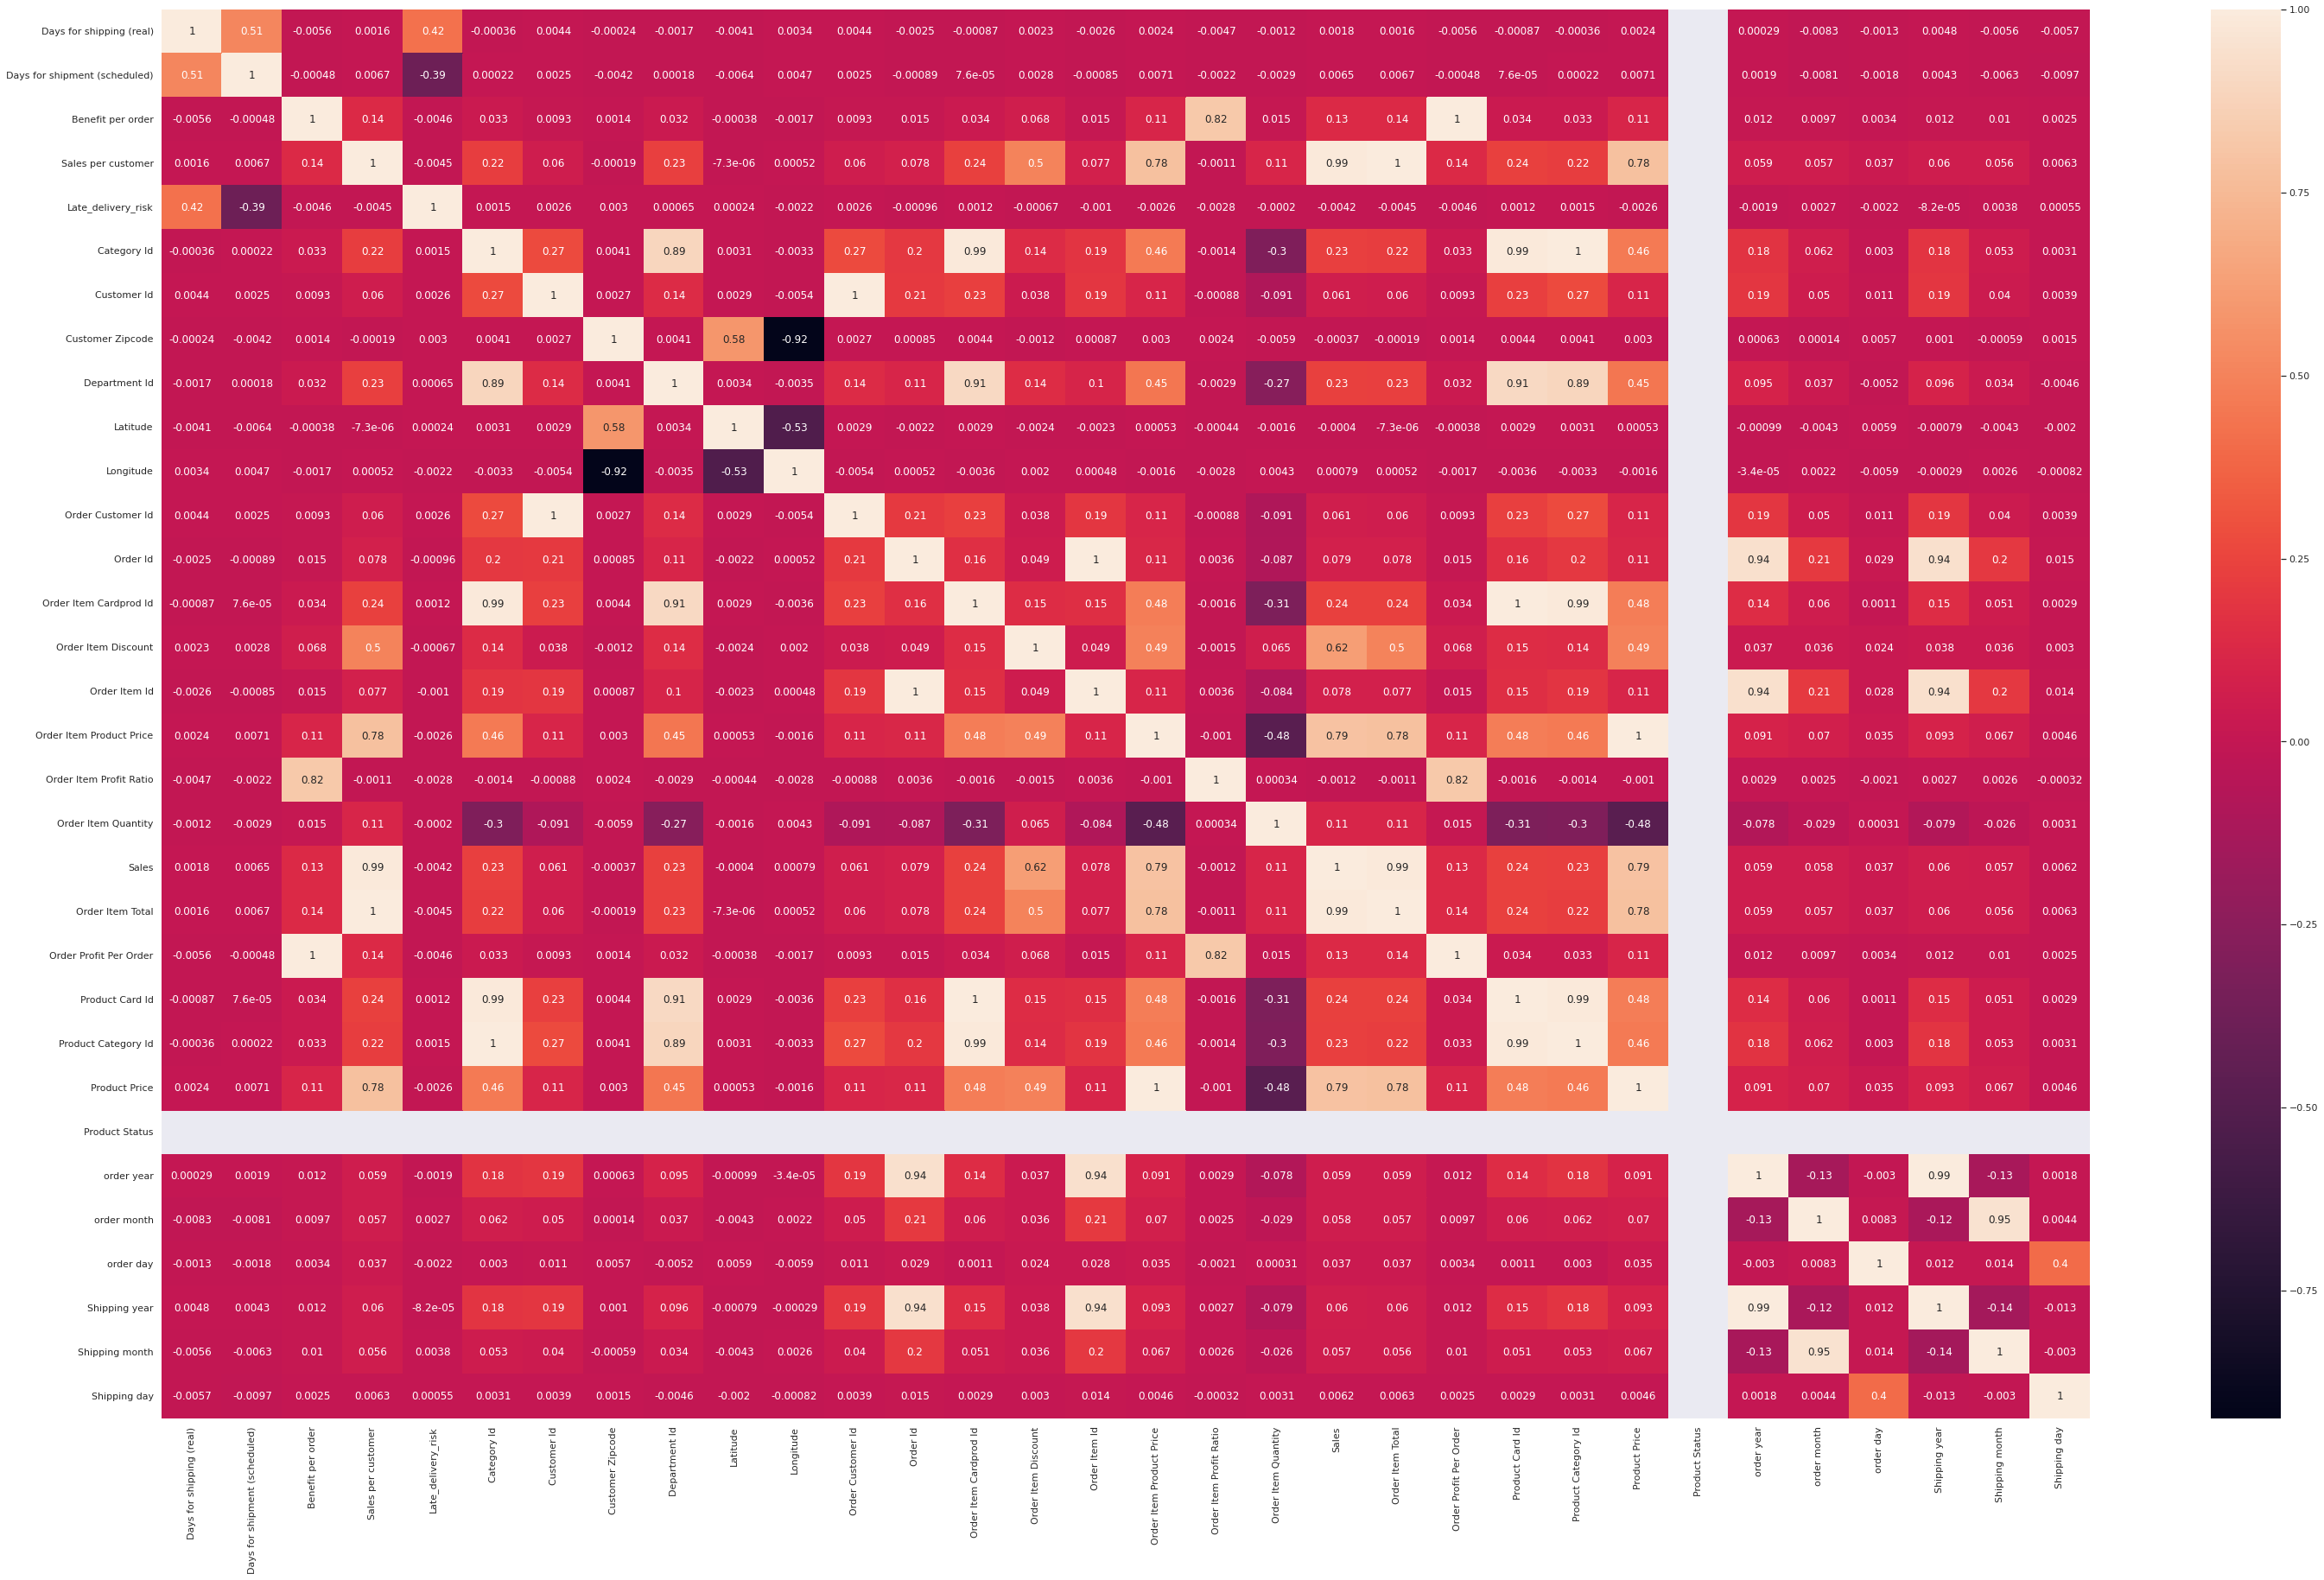

In [ ]:
sns.set(rc = {'figure.figsize':(50,30)})
sns.heatmap(df.corr(),annot=True)


In [ ]:
df=df.drop(["Product Category Id","Product Card Id","Order Item Cardprod Id","Benefit per order","Order Item Profit Ratio","Product Price","Order Item Total","Sales","Order Item Product Price","Order Item Id","Order Customer Id","Days for shipping (real)","Product Status","CustomerCity","Customer Country","CustomerState","Customer Zipcode","Customer Id","Order Id"],axis=1)

In [ ]:
df.shape

(172754, 27)

In [ ]:
df

,Type,Days for shipment (scheduled),Sales per customer,Late_delivery_risk,Category Id,CustomerSegment,Department Id,Latitude,Longitude,Market,OrderCity,Order Country,order date,Order Item Discount,Order Item Quantity,Order Profit Per Order,OrderRegion,OrderState,OrderStatus,shipping date (DateOrders),ShippingMode,order year,order month,order day,Shipping year,Shipping month,Shipping day
0,DEBIT,4,314.640015,0,73,Consumer,2,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,13.110000,1,91.250000,Southeast Asia,Java Occidental,COMPLETE,2018-02-03 22:56:00,Standard Class,2018,1,31,2018,2,3
1,TRANSFER,4,311.359985,1,73,Consumer,2,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,16.389999,1,-249.089996,South Asia,Rajastán,PENDING,2018-01-18 12:27:00,Standard Class,2018,1,13,2018,1,18
2,CASH,4,309.720001,0,73,Consumer,2,37.292233,-121.881279,Pacific Asia,Bikaner,India,2018-01-13 12:06:00,18.030001,1,-247.779999,South Asia,Rajastán,CLOSED,2018-01-17 12:06:00,Standard Class,2018,1,13,2018,1,17
3,DEBIT,4,304.809998,0,73,Home Office,2,34.125946,-118.291016,Pacific Asia,Townsville,Australia,2018-01-13 11:45:00,22.940001,1,22.860001,Oceania,Queensland,COMPLETE,2018-01-16 11:45:00,Standard Class,2018,1,13,2018,1,16
4,PAYMENT,4,298.250000,0,73,Corporate,2,18.253769,-66.037048,Pacific Asia,Townsville,Australia,2018-01-13 11:24:00,29.500000,1,134.210007,Oceania,Queensland,PENDING_PAYMENT,2018-01-15 11:24:00,Standard Class,2018,1,13,2018,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,399.980011,0,45,Home Office,7,40.640930,-73.942711,Pacific Asia,Shanghái,China,2016-01-16 03:40:00,0.000000,1,40.000000,Eastern Asia,Shanghái,CLOSED,2016-01-20 03:40:00,Standard Class,2016,1,16,2016,1,20
180515,DEBIT,2,395.980011,1,45,Corporate,7,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,2016-01-16 01:34:00,4.000000,1,-613.770019,Eastern Asia,Osaka,COMPLETE,2016-01-19 01:34:00,Second Class,2016,1,16,2016,1,19
180516,TRANSFER,4,391.980011,1,45,Corporate,7,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,2016-01-15 21:00:00,8.000000,1,141.110001,Oceania,Australia del Sur,PENDING,2016-01-20 21:00:00,Standard Class,2016,1,15,2016,1,20
180517,PAYMENT,4,387.980011,0,45,Consumer,7,18.213350,-66.370575,Pacific Asia,Adelaide,Australia,2016-01-15 20:18:00,12.000000,1,186.229996,Oceania,Australia del Sur,PENDING_PAYMENT,2016-01-18 20:18:00,Standard Class,2016,1,15,2016,1,18


In [ ]:
df.Type.value_counts() 

1.0    61617
3.0    37423
0.0    37063
2.0    17441
Name: Type, dtype: int64

In [ ]:
df.OrderCity.value_counts()

Santo Domingo    2128
New York City    2121
Los Angeles      1788
Tegucigalpa      1715
Managua          1578
                 ... 
Springs             1
Arrentela           1
Koidu               1
Fort Portal         1
Junín               1
Name: OrderCity, Length: 3585, dtype: int64

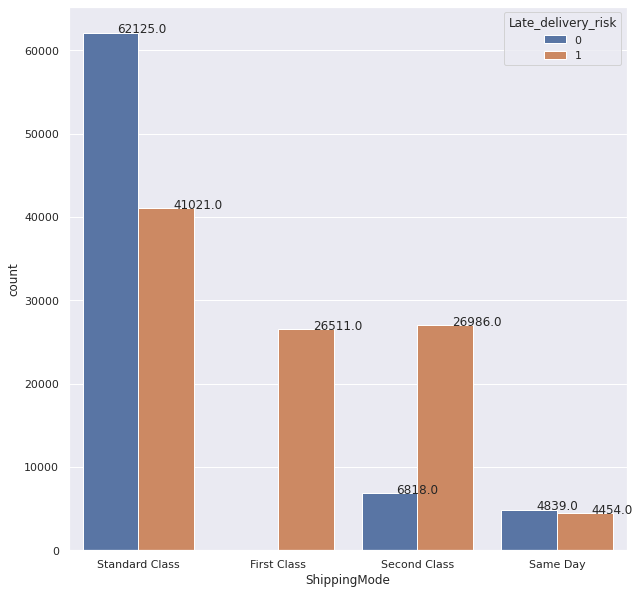

In [ ]:
sns.set(rc = {'figure.figsize':(10,10)})
ax=sns.countplot(x="ShippingMode",hue="Late_delivery_risk",data=df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

<Figure size 720x720 with 0 Axes>

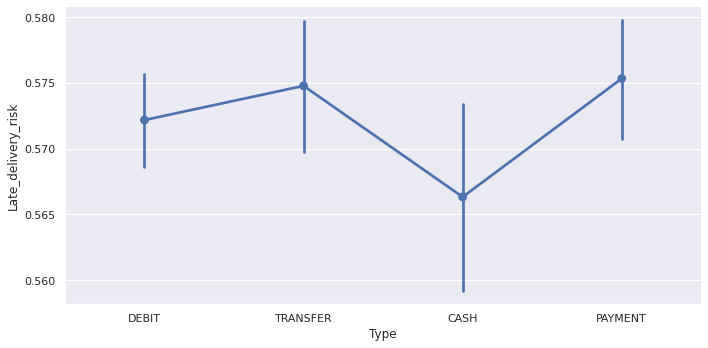

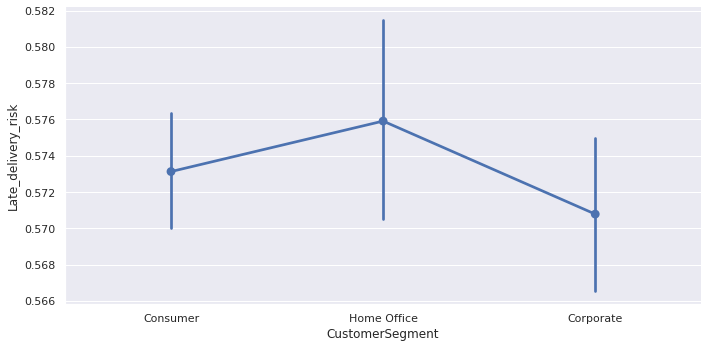

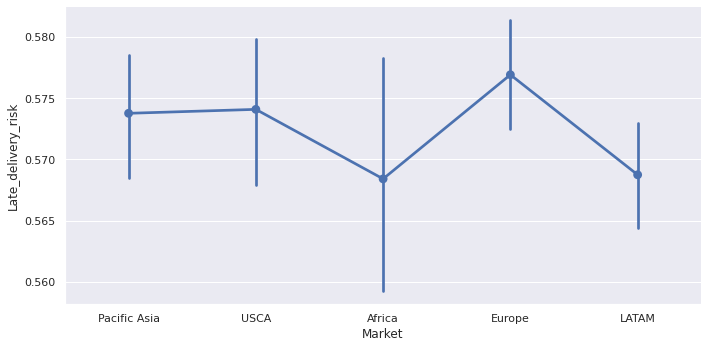

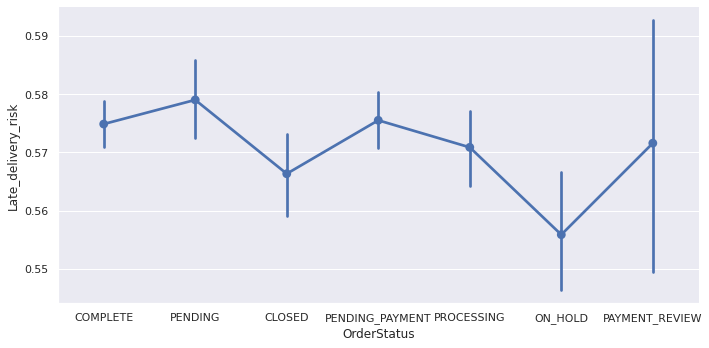

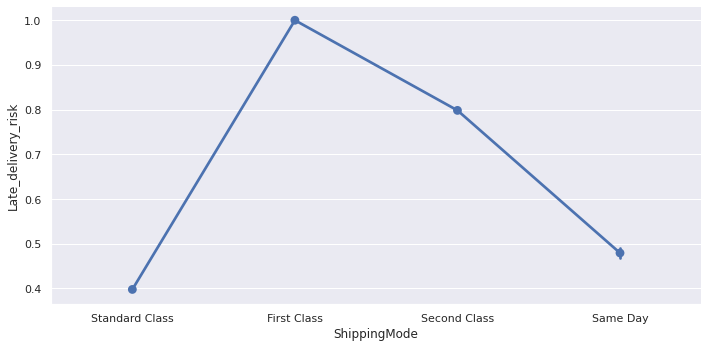

In [ ]:
sns.set(rc = {'figure.figsize':(10,10)})
for i, col in enumerate(['Type', 'CustomerSegment', 'Market' , 'OrderStatus', 'ShippingMode' ]):
  plt.figure(i)

  sns.catplot(x=col, y='Late_delivery_risk', data=df, kind='point', aspect=2,)

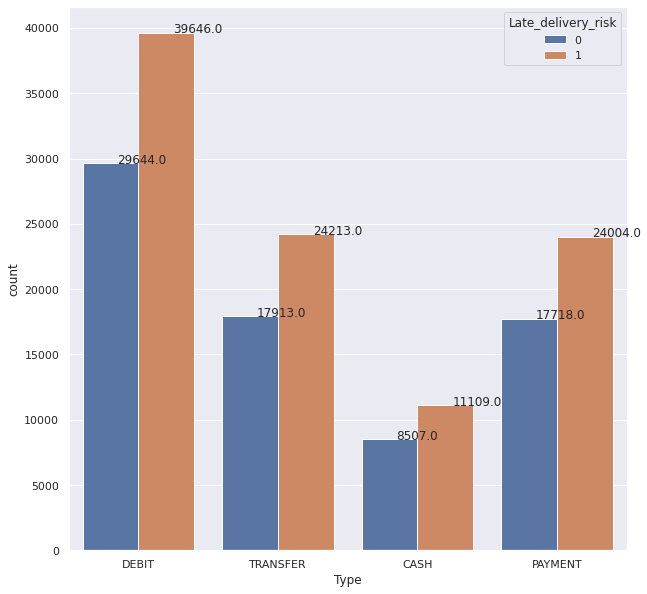

In [ ]:
sns.set(rc = {'figure.figsize':(10,10)})
ax=sns.countplot(x="Type",hue="Late_delivery_risk",data=df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

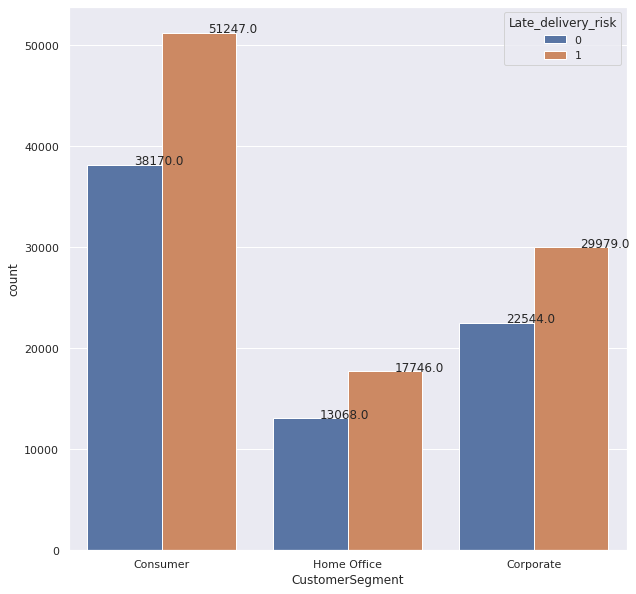

In [ ]:
sns.set(rc = {'figure.figsize':(10,10)})
ax=sns.countplot(x="CustomerSegment",hue="Late_delivery_risk",data=df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

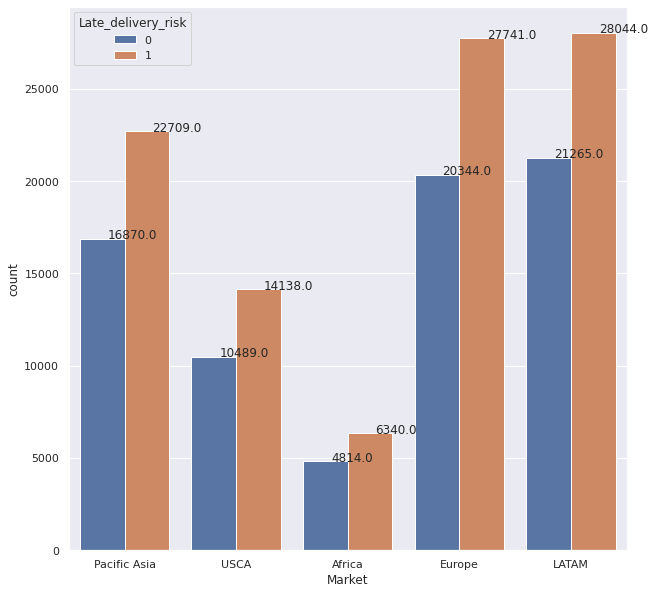

In [ ]:
sns.set(rc = {'figure.figsize':(10,10)})
ax=sns.countplot(x="Market",hue="Late_delivery_risk",data=df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

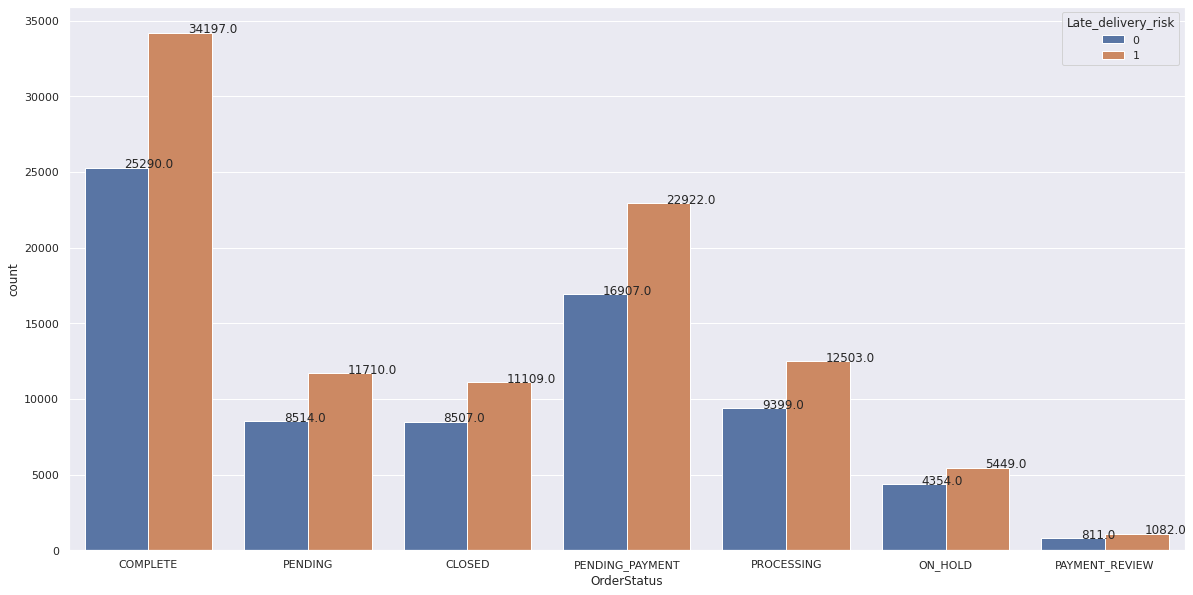

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
ax=sns.countplot(x="OrderStatus",hue="Late_delivery_risk",data=df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##encoding

In [ ]:
order =["Home Office","Consumer","Corporate"]
ordi = OrdinalEncoder(categories=[order])
ordi.fit(df[['CustomerSegment']])
df["CustomerSegment"]=ordi.transform(df[['CustomerSegment']])###ordinal encoding

In [ ]:
SMode =["First Class","Second Class","Same Day","Standard Class"]
ordi = OrdinalEncoder(categories=[SMode])
ordi.fit(df[['ShippingMode']])
df["ShippingMode"]=ordi.transform(df[['ShippingMode']])
#print(SMode)

In [ ]:

mket =["Europe","Pacific Asia","USCA","Africa","LATAM"]
ordi = OrdinalEncoder(categories=[mket])
ordi.fit(df[['Market']])
df["Market"]=ordi.transform(df[['Market']])

In [ ]:
Type =["PAYMENT","DEBIT","CASH","TRANSFER"]
ordi = OrdinalEncoder(categories=[Type])
ordi.fit(df[['Type']])
df["Type"]=ordi.transform(df[['Type']])

In [ ]:
encoder = TargetEncoder()
df['OrderRegion_encoder'] = encoder.fit_transform(df['OrderRegion'], df['Late_delivery_risk'])#target encoding

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:
df['OrderState_encoder'] = encoder.fit_transform(df['OrderState'], df['Late_delivery_risk'])

In [ ]:
df['OrderCountry_encoder'] = encoder.fit_transform(df['Order Country'], df['Late_delivery_risk'])

In [ ]:

df['OrderCity_encoder'] = encoder.fit_transform(df['OrderCity'], df['Late_delivery_risk'])


In [ ]:
df['Department Id']= df['Department Id'].map(str)
df["Category Id"]=df['Category Id'].map(str)

In [ ]:

df['Department_id_encoded'] = encoder.fit_transform(df['Department Id'], df['Late_delivery_risk'])

In [ ]:
df['Category_id_encoded'] = encoder.fit_transform(df['Category Id'], df['Late_delivery_risk'])

##OUTLIER IDENTIFICATION AND REMOVAL


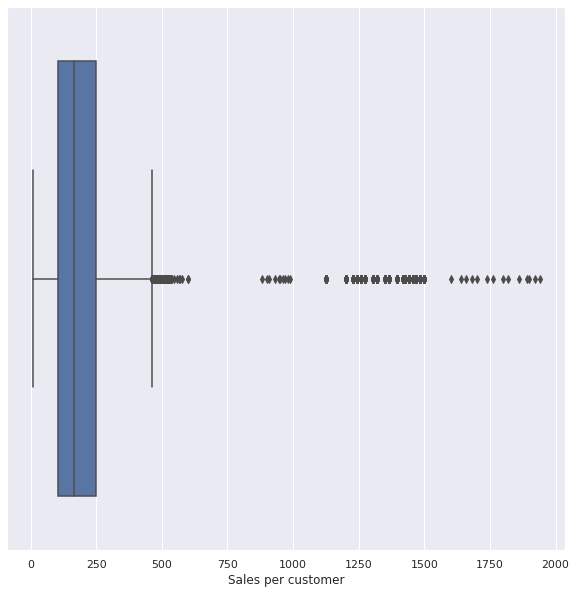

In [ ]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.boxplot(x=df['Sales per customer'])

In [ ]:
Q3 = df["Sales per customer"].quantile(.75)
Q1 = df["Sales per customer"].quantile(.25) 
IQR=Q3-Q1 
df = df[~((df["Sales per customer"] < (Q1 - 1.5 * IQR)) |(df["Sales per customer"] > (Q3 + 1.5 * IQR)))]

In [ ]:
df.shape

(170901, 33)

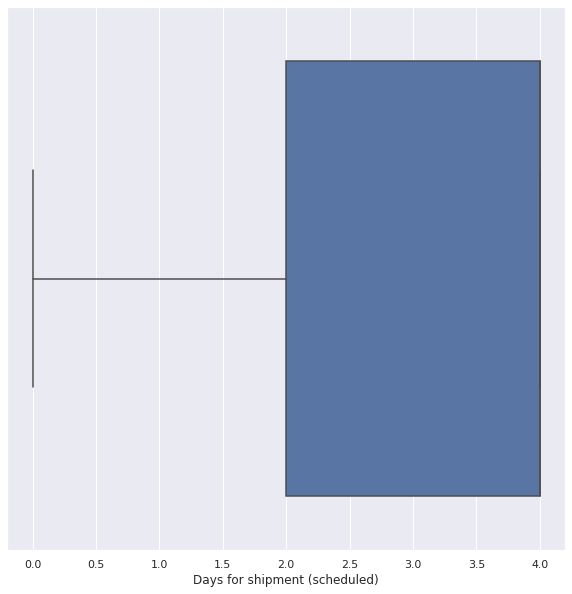

In [ ]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.boxplot(x=df["Days for shipment (scheduled)"])

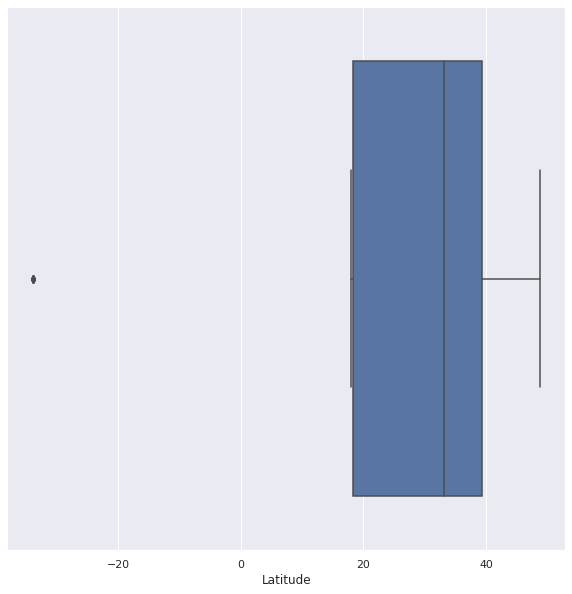

In [ ]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.boxplot(x=df["Latitude"])

In [ ]:

Q3 = df["Latitude"].quantile(.75)
Q1 = df["Latitude"].quantile(.25) 
IQR=Q3-Q1 
df = df[~((df["Latitude"] < (Q1 - 1.5 * IQR)) |(df["Latitude"] > (Q3 + 1.5 * IQR)))]

In [ ]:
df.shape

(170892, 33)

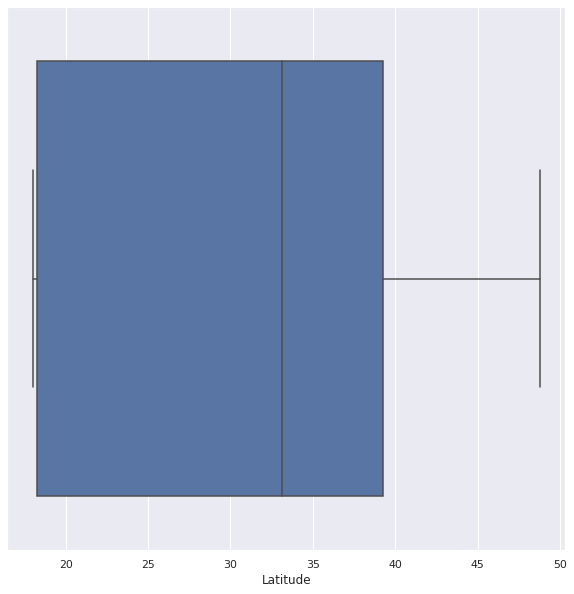

In [ ]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.boxplot(x=df["Latitude"])

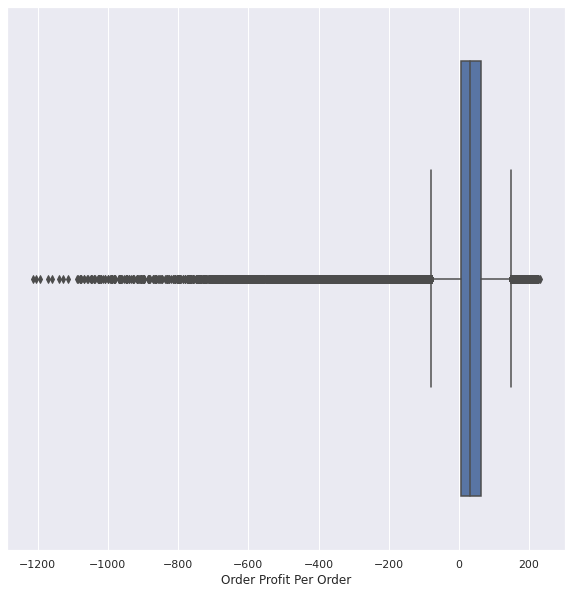

In [ ]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.boxplot(x=df["Order Profit Per Order"])

In [ ]:
Q3 = df["Order Profit Per Order"].quantile(.75)
Q1 = df["Order Profit Per Order"].quantile(.25) 
IQR=Q3-Q1 
df = df[~((df["Order Profit Per Order"] < (Q1 - 1.5 * IQR)) |(df["Order Profit Per Order"] > (Q3 + 1.5 * IQR)))]

In [ ]:
#df.head()

##Standardization of numerical variables

##FEATURE SELECTION


####Numerical Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from functools import partial
from sklearn.feature_selection import mutual_info_classif, SelectKBest

In [ ]:
score_func = partial(mutual_info_classif)
s = SelectKBest(score_func,k=5)

In [ ]:
#df_select.info()

In [ ]:
df_cat = df_select.drop(['Days for shipment (scheduled)','Benefit per order','Sales per customer','Latitude','Longitude','Order Item Discount','Order Item Discount Rate','Order Item Product Price','Order Item Profit Ratio','Order Item Quantity','Sales','Order Item Total','Order Profit Per Order','Product Price',"Late_delivery_risk",],axis =1)


In [ ]:
#df_cat.info()

In [ ]:
#df_cat.head()

In [ ]:
df_num =df_select.drop(df_cat.columns,axis=1)
df_num=df_num.drop("Late_delivery_risk",axis=1)

In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180508 entries, 0 to 180518
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipment (scheduled)  180508 non-null  int64  
 1   Benefit per order              180508 non-null  float64
 2   Sales per customer             180508 non-null  float64
 3   Latitude                       180508 non-null  float64
 4   Longitude                      180508 non-null  float64
 5   Order Item Discount            180508 non-null  float64
 6   Order Item Discount Rate       180508 non-null  float64
 7   Order Item Product Price       180508 non-null  float64
 8   Order Item Profit Ratio        180508 non-null  float64
 9   Order Item Quantity            180508 non-null  int64  
 10  Sales                          180508 non-null  float64
 11  Order Item Total               180508 non-null  float64
 12  Order Profit Per Order        

In [ ]:
df_num.head()

,Days for shipment (scheduled),Benefit per order,Sales per customer,Latitude,Longitude,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price
0,4,91.250000,314.640015,18.251453,-66.037056,13.110000,0.04,327.75,0.29,1,327.75,314.640015,91.250000,327.75
1,4,-249.089996,311.359985,18.279451,-66.037064,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996,327.75
2,4,-247.779999,309.720001,37.292233,-121.881279,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999,327.75
3,4,22.860001,304.809998,34.125946,-118.291016,22.940001,0.07,327.75,0.08,1,327.75,304.809998,22.860001,327.75
4,4,134.210007,298.250000,18.253769,-66.037048,29.500000,0.09,327.75,0.45,1,327.75,298.250000,134.210007,327.75


In [ ]:

x_new=s.fit_transform(df_num,df_select["Late_delivery_risk"])



In [ ]:
print(x_new)

[[   4.           18.2514534   -66.03705597  327.75          1.        ]
 [   4.           18.27945137  -66.0370636   327.75          1.        ]
 [   4.           37.29223251 -121.881279    327.75          1.        ]
 ...
 [   4.           41.62995911  -72.96715546  399.980011      1.        ]
 [   4.           18.2133503   -66.37057495  399.980011      1.        ]
 [   4.           18.29038048  -66.3706131   399.980011      1.        ]]


In [ ]:
#print(df_num.head())

we can see that the top five numerical features are ---- days for shipment scheduled,latitude ,longitude,order_item_quantity and sales

 **CATEGORICAL SELECTION**

In [ ]:
#encoding df_select

In [ ]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180508 entries, 0 to 180518
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180508 non-null  object        
 1   Days for shipment (scheduled)  180508 non-null  int64         
 2   Benefit per order              180508 non-null  float64       
 3   Sales per customer             180508 non-null  float64       
 4   Late_delivery_risk             180508 non-null  int64         
 5   Category Name                  180508 non-null  object        
 6   CustomerCity                   180508 non-null  object        
 7   Customer Country               180508 non-null  object        
 8   CustomerSegment                180508 non-null  object        
 9   CustomerState                  180508 non-null  object        
 10  Department Id                  180508 non-null  int64         
 11  

encoding of categorical features

In [ ]:
df_select['order date '] = pd.to_datetime(df_select['order date '])
df_select['shipping date (DateOrders)'] = pd.to_datetime(df_select['shipping date (DateOrders)'])

In [ ]:

df_select['order year'] = pd.DatetimeIndex(df_select['order date ']).year
df_select['order month'] = pd.DatetimeIndex(df_select['order date ']).month
df_select['order day'] = pd.DatetimeIndex(df_select['order date ']).day
df_select['Shipping year'] = pd.DatetimeIndex(df_select['shipping date (DateOrders)']).year
df_select['Shipping month'] = pd.DatetimeIndex(df_select['shipping date (DateOrders)']).month
df_select['Shipping day'] = pd.DatetimeIndex(df_select['shipping date (DateOrders)']).day

In [ ]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180508 entries, 0 to 180518
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180508 non-null  object        
 1   Days for shipment (scheduled)  180508 non-null  int64         
 2   Benefit per order              180508 non-null  float64       
 3   Sales per customer             180508 non-null  float64       
 4   Late_delivery_risk             180508 non-null  int64         
 5   Category Name                  180508 non-null  object        
 6   CustomerCity                   180508 non-null  object        
 7   Customer Country               180508 non-null  object        
 8   CustomerSegment                180508 non-null  object        
 9   CustomerState                  180508 non-null  object        
 10  Department Id                  180508 non-null  int64         
 11  

In [ ]:

Type =["PAYMENT","DEBIT","CASH","TRANSFER"]
ordi = OrdinalEncoder(categories=[Type])
ordi.fit(df_select[['Type']])
df_select["Type"]=ordi.transform(df_select[['Type']])

In [ ]:

order =["Home Office","Consumer","Corporate"]
ordi = OrdinalEncoder(categories=[order])
ordi.fit(df_select[['CustomerSegment']])
df_select["CustomerSegment"]=ordi.transform(df_select[['CustomerSegment']])

In [ ]:

df_select = df_select[~((df_select["OrderStatus"] == "SUSPECTED_FRAUD") |(df_select["OrderStatus"] =="CANCELED"))]

In [ ]:

SMode =["First Class","Second Class","Same Day","Standard Class"]
ordi = OrdinalEncoder(categories=[SMode])
ordi.fit(df_select[['ShippingMode']])
df_select["ShippingMode"]=ordi.transform(df_select[['ShippingMode']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:

mket =["Europe","Pacific Asia","USCA","Africa","LATAM"]
ordi = OrdinalEncoder(categories=[mket])
ordi.fit(df_select[['Market']])
df_select["Market"]=ordi.transform(df_select[['Market']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:

encoder = TargetEncoder()
df_select['OrderCity_encoder'] = encoder.fit_transform(df_select['OrderCity'], df_select['Late_delivery_risk'])

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172754 entries, 0 to 180518
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           172754 non-null  float64       
 1   Days for shipment (scheduled)  172754 non-null  int64         
 2   Benefit per order              172754 non-null  float64       
 3   Sales per customer             172754 non-null  float64       
 4   Late_delivery_risk             172754 non-null  int64         
 5   Category Name                  172754 non-null  object        
 6   CustomerCity                   172754 non-null  object        
 7   Customer Country               172754 non-null  object        
 8   CustomerSegment                172754 non-null  float64       
 9   CustomerState                  172754 non-null  object        
 10  Department Id                  172754 non-null  int64         
 11  

In [ ]:

encoder = TargetEncoder()
df_select['CategoryName_encoder'] = encoder.fit_transform(df_select['Category Name'], df_select['Late_delivery_risk'])

In [ ]:

order =["PENDING","COMPLETE","PENDING_PAYMENT","PAYMENT_REVIEW","PROCESSING","CLOSED","ON_HOLD"]
ordi = OrdinalEncoder(categories=[order])
ordi.fit(df_select[['OrderStatus']])
df_select["OrderStatus"]=ordi.transform(df_select[['OrderStatus']])

In [ ]:

encoder = TargetEncoder()
df_select['CustomerCity_encoder'] = encoder.fit_transform(df_select['CustomerCity'], df_select['Late_delivery_risk'])

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:

encoder = TargetEncoder()
df_select['CustomerState_encoder'] = encoder.fit_transform(df_select['CustomerState'], df_select['Late_delivery_risk'])

In [ ]:

order =['Pet Shop','Book Shop','Health and Beauty ','Fitness','Outdoors','Technology','Apparel', 'Golf' ,'Footwear','Fan Shop','Discs Shop' ]
ordi = OrdinalEncoder(categories=[order])
ordi.fit(df_select[['Department Name']])
df_select['Department Name']=ordi.transform(df_select[['Department Name']])

In [ ]:

encoder = TargetEncoder()
df_select['CustomerCity_encoder'] = encoder.fit_transform(df_select['CustomerCity'], df_select['Late_delivery_risk'])

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:

encoder = TargetEncoder()
df_select['OrderCity_encoder'] = encoder.fit_transform(df_select['OrderCity'], df_select['Late_delivery_risk'])


In [ ]:
encoder = TargetEncoder()
df_select['Order Country_encoder'] = encoder.fit_transform(df_select['Order Country'], df_select['Late_delivery_risk'])

In [ ]:
encoder = TargetEncoder()
df_select['OrderRegion_encoder'] = encoder.fit_transform(df_select['OrderRegion'], df_select['Late_delivery_risk'])

In [ ]:

encoder = TargetEncoder()
df_select['OrderState_encoder'] = encoder.fit_transform(df_select['OrderState'], df_select['Late_delivery_risk'])

In [ ]:

encoder = TargetEncoder()
df_select['Product Name_encoder'] = encoder.fit_transform(df_select['Product Name'], df_select['Late_delivery_risk'])

In [ ]:
#df_select.info()

In [ ]:
df_select=df_select.drop(['OrderRegion','Category Name','CustomerCity','OrderCity','Order Country','OrderState','Product Name','CustomerState','order date ','shipping date (DateOrders)'],axis=1)

In [ ]:
df_cat = df_select.drop(['Days for shipment (scheduled)','Benefit per order','Sales per customer','Latitude','Longitude','Order Item Discount','Order Item Discount Rate','Order Item Product Price','Order Item Profit Ratio','Order Item Quantity','Sales','Order Item Total','Order Profit Per Order','Product Price',"Late_delivery_risk",],axis =1)

In [ ]:
#df_cat.info()

In [ ]:
order =["EE. UU.","Puerto Rico"]
ordi = OrdinalEncoder(categories=[order])
ordi.fit(df_cat[['Customer Country']])
df_cat["Customer Country"]=ordi.transform(df_cat[['Customer Country']])

In [ ]:
df_cat = df_cat.drop("Customer Country",axis=1)

In [ ]:
#df_cat.info()

In [ ]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172754 entries, 0 to 180518
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           172754 non-null  float64
 1   Days for shipment (scheduled)  172754 non-null  int64  
 2   Benefit per order              172754 non-null  float64
 3   Sales per customer             172754 non-null  float64
 4   Late_delivery_risk             172754 non-null  int64  
 5   Customer Country               172754 non-null  object 
 6   CustomerSegment                172754 non-null  float64
 7   Department Id                  172754 non-null  int64  
 8   Department Name                172754 non-null  float64
 9   Latitude                       172754 non-null  float64
 10  Longitude                      172754 non-null  float64
 11  Market                         172754 non-null  float64
 12  Order Item Discount           

**Filter Method**

In [ ]:
data = df_cat.values

X = data
Y = df_select.values[:,4].astype(int)

In [ ]:
Y

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
chi_best = SelectKBest(score_func=chi2,k=10)
k_best = chi_best.fit(X,Y)

#summarize scores
np.set_printoptions(precision=3)
print(k_best.scores_)

[9.243e-02 8.767e-01 3.576e-02 1.128e+00 9.918e+00 2.400e+01 2.639e+04
 2.084e-04 2.338e+00 4.127e+00 3.941e-07 4.665e+00 2.557e-01 4.846e+02
 5.305e-03 8.913e+00 3.499e-02 7.978e-01 1.451e-02 4.441e+01 2.766e-02]


In [ ]:
print(df_cat.columns)

Index(['Type', 'CustomerSegment', 'Department Id', 'Department Name', 'Market',
       'OrderStatus', 'ShippingMode', 'order year', 'order month', 'order day',
       'Shipping year', 'Shipping month', 'Shipping day', 'OrderCity_encoder',
       'CategoryName_encoder', 'CustomerCity_encoder', 'CustomerState_encoder',
       'Order Country_encoder', 'OrderRegion_encoder', 'OrderState_encoder',
       'Product Name_encoder'],
      dtype='object')


In [ ]:
k_features = k_best.transform(X)
#summarize selected features
print(k_features[0:5,:])

[[ 3.     1.     1.     3.     1.    31.     2.     0.583  0.572  0.577]
 [ 3.     1.     0.     3.     1.    13.     1.     0.6    0.572  0.612]
 [ 3.     1.     5.     3.     1.    13.     1.     0.6    0.543  0.612]
 [ 3.     1.     1.     3.     1.    13.     1.     0.43   0.567  0.593]
 [ 3.     1.     2.     3.     1.    13.     1.     0.43   0.572  0.593]]


**Wrapper method**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Feature Extraction

model_lr = LogisticRegression()
recur_fe = RFE(model_lr,n_features_to_select=10)
Feature = recur_fe.fit(X,Y)
print("No of features = %s" % (Feature.n_features_))
print("Selected features are %s" % (Feature.support_))
print("Feature ranking = %s" % (Feature.ranking_))

No of features = 10
Selected features are [False False False False False False  True  True False False  True  True
 False  True False  True  True  True False  True  True]
Feature ranking = [10  3  7  4  6  5  1  1  2  9  1  1 12  1 11  1  1  1  8  1  1]


In [ ]:
#print(df_cat.columns)

**Embedded Method**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_reg = Ridge(alpha = 1.0)
ridge_reg.fit(X,Y)

Ridge()

In [ ]:
def print_coefs(coef,names = None,sort=False):
    if names == None:
        names= ['X%s' % x for x in range(len(coef))]
    lst = zip(coef,names)
    if sort:
        lst = sorted(lst, key=lambda x:np.abs(x[0]))
    return '+' .join('%s * %s' % (round(coefs,3),name) for coefs, name in lst)

In [ ]:
print('Ridge Model : ',print_coefs(ridge_reg.coef_))

Ridge Model :  0.002 * X0+-0.001 * X1+0.0 * X2+0.0 * X3+-0.001 * X4+-0.001 * X5+-0.242 * X6+-41.524 * X7+-3.456 * X8+-0.114 * X9+41.525 * X10+3.457 * X11+0.114 * X12+0.527 * X13+-0.164 * X14+0.499 * X15+0.022 * X16+-0.024 * X17+-0.053 * X18+-0.003 * X19+0.443 * X20


###TRAIN TEST SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Late_delivery_risk",'order date ',"shipping date (DateOrders)","order year","Shipping year","Category Id","Department Id","OrderRegion","OrderState","Order Country","OrderCity"],axis=1),df["Late_delivery_risk"],test_size=.25, random_state=40)

In [ ]:
X_train

,Type,Days for shipment (scheduled),Sales per customer,CustomerSegment,Latitude,Longitude,Market,Order Item Discount,Order Item Quantity,Order Profit Per Order,OrderStatus,ShippingMode,order month,order day,Shipping month,Shipping day,OrderRegion_encoder,OrderState_encoder,OrderCountry_encoder,OrderCity_encoder,Department_id_encoded,Category_id_encoded
121317,3.0,4,82.989998,1.0,31.720966,-106.343178,4.0,17.000000,1,-14.520000,PENDING,3.0,5,19,5,21,0.571842,0.513771,0.544414,0.513771,0.572241,0.569551
65086,1.0,2,290.980011,1.0,38.348824,-121.972420,1.0,9.000000,1,84.379997,COMPLETE,1.0,12,2,12,7,0.567126,0.575758,0.567843,0.642045,0.571939,0.569051
5273,3.0,4,143.979996,2.0,33.589874,-112.116371,4.0,35.990002,3,18.000000,PROCESSING,3.0,5,19,5,23,0.571061,0.594077,0.594595,0.586185,0.572190,0.573956
95960,2.0,4,149.380005,0.0,41.893967,-88.096603,2.0,30.590000,3,37.340000,CLOSED,3.0,4,15,4,19,0.581684,0.602191,0.576307,0.594531,0.580034,0.574959
130133,1.0,4,164.000000,1.0,36.098419,-115.133270,4.0,36.000000,4,-11.640000,COMPLETE,3.0,4,20,4,23,0.571061,0.586219,0.580995,0.561404,0.572841,0.570491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64619,1.0,2,35.189999,1.0,39.637722,-78.826248,4.0,4.800000,1,7.040000,COMPLETE,1.0,3,18,3,23,0.555276,0.505898,0.536076,0.491803,0.572841,0.576129
106468,0.0,1,219.910004,0.0,26.231449,-80.125221,4.0,29.990000,5,54.980000,PENDING_PAYMENT,0.0,4,11,4,13,0.571842,0.843750,0.544414,0.750000,0.571939,0.572009
35285,2.0,4,62.610001,1.0,40.861073,-73.889931,2.0,9.350000,4,20.660000,CLOSED,3.0,5,22,5,26,0.567874,0.568085,0.576307,0.539709,0.580015,0.573770
130272,1.0,4,235.160004,1.0,40.676659,-73.900330,1.0,4.800000,4,85.360001,COMPLETE,3.0,1,27,1,30,0.563238,0.576079,0.566986,0.612782,0.572190,0.573956


###one hot encoding of order status


In [ ]:
transformer = ColumnTransformer(transformers=[
    ('tnf3',OneHotEncoder(sparse=False,drop='first'),['OrderStatus'])
],remainder='passthrough')

In [ ]:
X_train

,Type,Days for shipment (scheduled),Sales per customer,CustomerSegment,Latitude,Longitude,Market,Order Item Discount,Order Item Quantity,Order Profit Per Order,OrderStatus,ShippingMode,order month,order day,Shipping month,Shipping day,OrderRegion_encoder,OrderState_encoder,OrderCountry_encoder,OrderCity_encoder,Department_id_encoded,Category_id_encoded
121317,3.0,4,82.989998,1.0,31.720966,-106.343178,4.0,17.000000,1,-14.520000,PENDING,3.0,5,19,5,21,0.571842,0.513771,0.544414,0.513771,0.572241,0.569551
65086,1.0,2,290.980011,1.0,38.348824,-121.972420,1.0,9.000000,1,84.379997,COMPLETE,1.0,12,2,12,7,0.567126,0.575758,0.567843,0.642045,0.571939,0.569051
5273,3.0,4,143.979996,2.0,33.589874,-112.116371,4.0,35.990002,3,18.000000,PROCESSING,3.0,5,19,5,23,0.571061,0.594077,0.594595,0.586185,0.572190,0.573956
95960,2.0,4,149.380005,0.0,41.893967,-88.096603,2.0,30.590000,3,37.340000,CLOSED,3.0,4,15,4,19,0.581684,0.602191,0.576307,0.594531,0.580034,0.574959
130133,1.0,4,164.000000,1.0,36.098419,-115.133270,4.0,36.000000,4,-11.640000,COMPLETE,3.0,4,20,4,23,0.571061,0.586219,0.580995,0.561404,0.572841,0.570491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64619,1.0,2,35.189999,1.0,39.637722,-78.826248,4.0,4.800000,1,7.040000,COMPLETE,1.0,3,18,3,23,0.555276,0.505898,0.536076,0.491803,0.572841,0.576129
106468,0.0,1,219.910004,0.0,26.231449,-80.125221,4.0,29.990000,5,54.980000,PENDING_PAYMENT,0.0,4,11,4,13,0.571842,0.843750,0.544414,0.750000,0.571939,0.572009
35285,2.0,4,62.610001,1.0,40.861073,-73.889931,2.0,9.350000,4,20.660000,CLOSED,3.0,5,22,5,26,0.567874,0.568085,0.576307,0.539709,0.580015,0.573770
130272,1.0,4,235.160004,1.0,40.676659,-73.900330,1.0,4.800000,4,85.360001,COMPLETE,3.0,1,27,1,30,0.563238,0.576079,0.566986,0.612782,0.572190,0.573956


# **Standardising Numerical Values**

In [ ]:
X_train

,Type,Days for shipment (scheduled),Sales per customer,CustomerSegment,Latitude,Longitude,Market,Order Item Discount,Order Item Quantity,Order Profit Per Order,OrderStatus,ShippingMode,order month,order day,Shipping month,Shipping day,OrderRegion_encoder,OrderState_encoder,OrderCountry_encoder,OrderCity_encoder,Department_id_encoded,Category_id_encoded
121317,3.0,4,82.989998,1.0,31.720966,-106.343178,4.0,17.000000,1,-14.520000,PENDING,3.0,5,19,5,21,0.571842,0.513771,0.544414,0.513771,0.572241,0.569551
65086,1.0,2,290.980011,1.0,38.348824,-121.972420,1.0,9.000000,1,84.379997,COMPLETE,1.0,12,2,12,7,0.567126,0.575758,0.567843,0.642045,0.571939,0.569051
5273,3.0,4,143.979996,2.0,33.589874,-112.116371,4.0,35.990002,3,18.000000,PROCESSING,3.0,5,19,5,23,0.571061,0.594077,0.594595,0.586185,0.572190,0.573956
95960,2.0,4,149.380005,0.0,41.893967,-88.096603,2.0,30.590000,3,37.340000,CLOSED,3.0,4,15,4,19,0.581684,0.602191,0.576307,0.594531,0.580034,0.574959
130133,1.0,4,164.000000,1.0,36.098419,-115.133270,4.0,36.000000,4,-11.640000,COMPLETE,3.0,4,20,4,23,0.571061,0.586219,0.580995,0.561404,0.572841,0.570491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64619,1.0,2,35.189999,1.0,39.637722,-78.826248,4.0,4.800000,1,7.040000,COMPLETE,1.0,3,18,3,23,0.555276,0.505898,0.536076,0.491803,0.572841,0.576129
106468,0.0,1,219.910004,0.0,26.231449,-80.125221,4.0,29.990000,5,54.980000,PENDING_PAYMENT,0.0,4,11,4,13,0.571842,0.843750,0.544414,0.750000,0.571939,0.572009
35285,2.0,4,62.610001,1.0,40.861073,-73.889931,2.0,9.350000,4,20.660000,CLOSED,3.0,5,22,5,26,0.567874,0.568085,0.576307,0.539709,0.580015,0.573770
130272,1.0,4,235.160004,1.0,40.676659,-73.900330,1.0,4.800000,4,85.360001,COMPLETE,3.0,1,27,1,30,0.563238,0.576079,0.566986,0.612782,0.572190,0.573956


In [ ]:
import pandas as pd
import scipy
from scipy import stats

**X_train**

In [ ]:
X_train['Type'] = stats.zscore(X_train['Type'])

In [ ]:
X_train['Days for shipment (scheduled)'] = stats.zscore(X_train['Days for shipment (scheduled)'])

In [ ]:
X_train['Sales per customer'] = stats.zscore(X_train['Sales per customer'])

In [ ]:
X_train['Latitude'] = stats.zscore(X_train['Latitude'])

In [ ]:
X_train['Longitude'] = stats.zscore(X_train['Longitude'])

In [ ]:
X_train['Market'] = stats.zscore(X_train['Market'])

In [ ]:
X_train['CustomerSegment'] = stats.zscore(X_train['CustomerSegment'])

In [ ]:
X_train['Order Item Discount'] = stats.zscore(X_train['Order Item Discount'])

In [ ]:
X_train['Order Item Quantity'] = stats.zscore(X_train['Order Item Quantity'])

In [ ]:
X_train['Order Profit Per Order'] = stats.zscore(X_train['Order Profit Per Order'])

In [ ]:
X_train['ShippingMode'] = stats.zscore(X_train['ShippingMode'])

In [ ]:
X_train['order month'] = stats.zscore(X_train['order month'])

In [ ]:
X_train['order day'] = stats.zscore(X_train['order day'])

In [ ]:
X_train['Shipping month'] = stats.zscore(X_train['Shipping month'])

In [ ]:
X_train['Shipping day'] = stats.zscore(X_train['Shipping day'])

**X_test**

In [ ]:
X_test['Shipping day'] = stats.zscore(X_test['Shipping day'])
X_test['Shipping month'] = stats.zscore(X_test['Shipping month'])
X_test['order day'] = stats.zscore(X_test['order day'])
X_test['order month'] = stats.zscore(X_test['order month'])
X_test['ShippingMode'] = stats.zscore(X_test['ShippingMode'])
X_test['Order Profit Per Order'] = stats.zscore(X_test['Order Profit Per Order'])
X_test['Order Item Quantity'] = stats.zscore(X_test['Order Item Quantity'])
X_test['Order Item Discount'] = stats.zscore(X_test['Order Item Discount'])
X_test['CustomerSegment'] = stats.zscore(X_test['CustomerSegment'])
X_test['Longitude'] = stats.zscore(X_test['Longitude'])
X_test['Latitude'] = stats.zscore(X_test['Latitude'])
X_test['Sales per customer'] = stats.zscore(X_test['Sales per customer'])
X_test['Days for shipment (scheduled)'] = stats.zscore(X_test['Days for shipment (scheduled)'])
X_test['Type'] = stats.zscore(X_test['Type'])
X_test['Market'] = stats.zscore(X_test['Market'])

In [ ]:
X_test

,Type,Days for shipment (scheduled),Sales per customer,CustomerSegment,Latitude,Longitude,Market,Order Item Discount,Order Item Quantity,Order Profit Per Order,OrderStatus,ShippingMode,order month,order day,Shipping month,Shipping day,OrderRegion_encoder,OrderState_encoder,OrderCountry_encoder,OrderCity_encoder,Department_id_encoded,Category_id_encoded
119351,1.497976,-0.688872,-0.656553,-0.179242,1.196199,0.561549,1.341196,-0.257662,0.614502,-2.739408,PROCESSING,-0.934145,-1.231281,-1.552390,-1.238943,-1.091333,0.555276,0.750000,0.550476,0.750000,0.572841,0.576129
149377,-0.326593,0.773483,-1.290250,-1.639424,-1.175743,0.872348,0.084483,-0.745822,-0.778945,-0.505511,COMPLETE,0.763320,0.531532,-0.761066,0.527045,-0.525189,0.581684,0.638978,0.576307,0.645833,0.572841,0.570491
66979,-0.326593,0.773483,0.059169,1.280940,-1.174127,0.872344,-1.172231,0.344749,-0.082222,-0.542715,ON_HOLD,0.763320,0.825334,0.595488,0.821377,0.946784,0.585308,0.587514,0.582032,0.833333,0.572241,0.569551
3793,0.585691,-1.420049,1.094826,1.280940,-1.180413,0.872344,1.341196,0.396681,0.614502,1.358479,CLOSED,-1.782877,-0.937479,0.143303,-0.944612,0.380640,0.571842,0.227273,0.544414,0.333334,0.572241,0.569551
72237,1.497976,-0.688872,0.135648,1.280940,0.452825,-1.594517,-0.543874,0.787729,-0.778945,0.254445,PROCESSING,-0.934145,-1.525083,1.725949,-1.238943,-1.317790,0.579829,0.557407,0.579000,0.571059,0.572190,0.581876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178130,-0.326593,0.773483,-0.767557,-0.179242,-1.179450,0.872344,1.341196,-0.745822,-0.082222,0.152075,COMPLETE,0.763320,-0.349874,0.369395,-0.355949,0.720326,0.571842,0.549618,0.571447,0.549020,0.571939,0.572009
151212,-1.238878,0.773483,1.879599,-0.179242,0.311311,-0.540675,0.084483,1.694981,-0.778945,1.485731,PENDING_PAYMENT,0.763320,0.531532,-1.439343,0.527045,-1.091333,0.581684,0.524064,0.576307,0.600000,0.571939,0.573426
17963,0.585691,-0.688872,-0.871865,1.280940,0.779643,-1.701542,0.712839,-0.226502,-0.778945,-0.704090,CLOSED,-0.934145,1.119136,1.612903,1.410040,-1.204561,0.546906,0.546697,0.547608,0.546697,0.572241,0.569551
7330,-0.326593,-0.688872,-0.892685,-0.179242,-1.177635,0.887621,0.084483,-0.122638,-0.082222,-0.708830,COMPLETE,-0.934145,0.531532,0.482441,0.527045,0.946784,0.567874,0.568085,0.576307,0.539709,0.572841,0.570491


In [ ]:
X_train

,Type,Days for shipment (scheduled),Sales per customer,CustomerSegment,Latitude,Longitude,Market,Order Item Discount,Order Item Quantity,Order Profit Per Order,OrderStatus,ShippingMode,order month,order day,Shipping month,Shipping day,OrderRegion_encoder,OrderState_encoder,OrderCountry_encoder,OrderCity_encoder,Department_id_encoded,Category_id_encoded
121317,1.496791,0.778635,-0.895727,-0.184883,0.204139,-1.002123,1.350249,-0.130071,-0.779333,-1.242768,PENDING,0.767449,-0.358922,0.374333,-0.364760,0.601708,0.571842,0.513771,0.544414,0.513771,0.572241,0.569551
65086,-0.328807,-0.674906,1.273530,-0.184883,0.880201,-1.731932,-0.538929,-0.543044,-0.779333,1.079996,COMPLETE,-0.922150,1.701092,-1.554595,1.699382,-0.990642,0.567126,0.575758,0.567843,0.642045,0.571939,0.569051
5273,1.496791,0.778635,-0.259624,1.279406,0.394774,-1.271703,1.350249,0.850223,0.617422,-0.479004,PROCESSING,0.767449,-0.358922,0.374333,-0.364760,0.829186,0.571061,0.594077,0.594595,0.586185,0.572190,0.573956
95960,0.583992,0.778635,-0.203304,-1.649172,1.241817,-0.150097,0.090797,0.571466,0.617422,-0.024784,CLOSED,0.767449,-0.653209,-0.079532,-0.659637,0.374229,0.581684,0.602191,0.576307,0.594531,0.580034,0.574959
130133,-0.328807,0.778635,-0.050823,-0.184883,0.650653,-1.412577,1.350249,0.850739,1.315800,-1.175128,COMPLETE,0.767449,-0.653209,0.487799,-0.659637,0.829186,0.571061,0.586219,0.580995,0.561404,0.572841,0.570491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64619,-0.328807,-0.674906,-1.394263,-0.184883,1.011673,0.282783,1.350249,-0.759854,-0.779333,-0.736410,COMPLETE,-0.922150,-0.947497,0.260867,-0.954514,0.829186,0.555276,0.505898,0.536076,0.491803,0.572841,0.576129
106468,-1.241606,-1.401677,0.532297,-1.649172,-0.355809,0.222127,1.350249,0.540493,2.014177,0.389508,PENDING_PAYMENT,-1.766950,-0.653209,-0.533398,-0.659637,-0.308207,0.571842,0.843750,0.544414,0.750000,0.571939,0.572009
35285,0.583992,0.778635,-1.108283,-0.184883,1.136459,0.513285,0.090797,-0.524976,1.315800,-0.416531,CLOSED,0.767449,-0.358922,0.714732,-0.364760,1.170404,0.567874,0.568085,0.576307,0.539709,0.580015,0.573770
130272,-0.328807,0.778635,0.691349,-0.184883,1.117648,0.512799,-0.538929,-0.759854,1.315800,1.103013,COMPLETE,0.767449,-1.536072,1.282064,-1.544269,1.625361,0.563238,0.576079,0.566986,0.612782,0.572190,0.573956


In [ ]:
X_train=transformer.fit_transform(X_train)
X_test=transformer.fit_transform(X_test)

In [ ]:
print(X_train)

[[0.    0.    0.    ... 0.514 0.572 0.57 ]
 [1.    0.    0.    ... 0.642 0.572 0.569]
 [0.    0.    0.    ... 0.586 0.572 0.574]
 ...
 [0.    0.    0.    ... 0.54  0.58  0.574]
 [1.    0.    0.    ... 0.613 0.572 0.574]
 [0.    0.    0.    ... 0.586 0.572 0.57 ]]


##TRAINING THE MODEL

###LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold=StratifiedKFold(n_splits=5)
forest1=RandomForestClassifier(criterion='gini',max_features="log2",min_samples_leaf=10,max_depth=30,n_estimators=100, random_state=100)
scores5=cross_val_score(forest1,X_train,y_train,scoring="recall", cv=skfold).mean()
scores5

In [ ]:
y_pred=log.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72     16435
           1       0.83      0.66      0.73     21951

    accuracy                           0.73     38386
   macro avg       0.73      0.74      0.73     38386
weighted avg       0.75      0.73      0.73     38386



##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)


In [ ]:
params = {
    'n_estimators' : [10,20,100],
    'max_depth' : [2,3]
}

###hyperparameter tuning

In [ ]:
gs = GridSearchCV(estimator=rfc, param_grid=params, cv=5, n_jobs=-1)

In [ ]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3], 'n_estimators': [10, 20, 100]})

In [ ]:
gs.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [ ]:
rf=RandomForestClassifier(random_state=None,**gs.best_params_)

In [ ]:
modelRF=rfc.fit(X_train,y_train)

In [ ]:
y_pred=rfc.predict(X_test)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold=StratifiedKFold(n_splits=5)
model3 = RandomForestClassifier(random_state=None,**gs.best_params_)
scores4=cross_val_score(model1,X_train,y_train,scoring="precision", cv=skfold).mean()
scores4

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     16435
           1       0.94      0.89      0.91     21951

    accuracy                           0.90     38386
   macro avg       0.90      0.91      0.90     38386
weighted avg       0.91      0.90      0.90     38386



In [ ]:
 print(roc_auc_score(y_test,y_pred))

0.9056807153948564


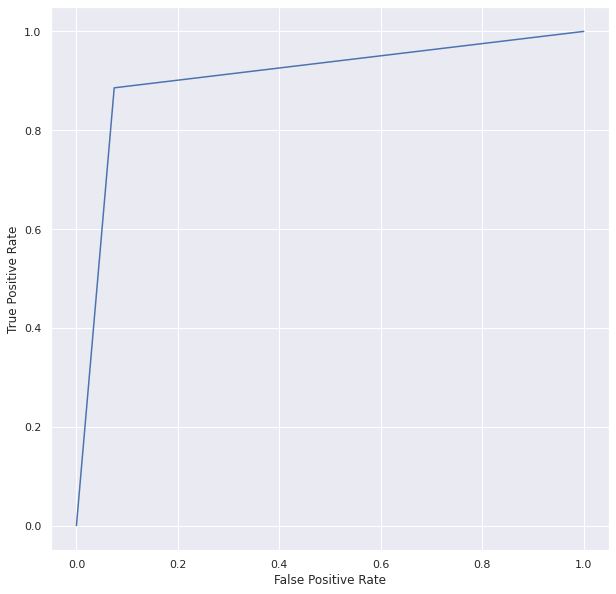

In [ ]:
fpr, tpr,_ = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(modelRF,X_train,y_train,cv=10)
scores

array([0.917, 0.929, 0.92 , 0.921, 0.914, 0.927, 0.924, 0.921, 0.918,
       0.922])

In [ ]:
scores.mean()

0.9213428223934923


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold=StratifiedKFold(n_splits=5)
model4 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
scores6=cross_val_score(model4,X_train,y_train,scoring="roc_auc", cv=skfold).mean()
scores6

In [ ]:
#y_pred=classifier.predict(X_test)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold=StratifiedKFold(n_splits=5)
model2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
scores3=cross_val_score(model2,X_train,y_train,scoring="roc_auc", cv=skfold).mean()
scores3

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     16435
           1       0.94      0.89      0.91     21951

    accuracy                           0.90     38386
   macro avg       0.90      0.91      0.90     38386
weighted avg       0.91      0.90      0.90     38386



In [ ]:
 print(roc_auc_score(y_test,y_pred))

0.9056807153948564


SVC

In [ ]:
from sklearn import svm

In [ ]:
#svmachine = svm.SVC(probability=True, C=.01 )

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold=StratifiedKFold(n_splits=5)
model5 = svm.SVC(probability=True )
scores7=cross_val_score(model5,X_train,y_train,scoring="precision", cv=skfold).mean()
scores7

SVM


In [ ]:
from sklearn.svm import SVC

In [ ]:
#classifier2=SVC(kernel="linear",random_state=0)
#classifier2.fit(X_train,y_train)

In [ ]:
#y_pred=classifier2.predict(X_test)

In [ ]:
#print(classification_report(y_test,y_pred))

NAIVE BAYES

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB  
classifier1 = GaussianNB()  
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test) 


In [ ]:
y_pred_proba4 = classifier1.predict_proba(X_test)[::,1]

In [ ]:
auc = metrics.roc_auc_score(y_test, y_pred_proba4)
auc

0.7879435233523482

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold=StratifiedKFold(n_splits=5)
model2 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
scores3=cross_val_score(model2,x_res,y_res,scoring="recall", cv=skfold).mean()
scores3

NameError: ignored

In [ ]:
print(classification_report(y_test,y_pred))

GRADIENT BOOST




In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)

In [ ]:
y_pred = gb_clf.predict(X_test) 
y_pred_proba5 = gb_clf.predict_proba(X_test)[::,1]

In [ ]:
auc2 = metrics.roc_auc_score(y_test, y_pred_proba5)
auc2

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold=StratifiedKFold(n_splits=5)
model7 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0
scores7=cross_val_score(model5,X_train,y_train,scoring="precision", cv=skfold).mean()
scores7

###deploying the model

In [ ]:
import pickle

In [ ]:
3filename ="trained_mod.sav"
#pickle.dump(rfc,open(filename,"wb"))

In [ ]:
#loaded model
#loaded_model=pickle.load(open("trained_mod.sav","rb"))

In [ ]:
#from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import cross_val_score
#skfold=StratifiedKFold(n_splits=5)
#model6 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0
#p=cross_val_score(model6,X_train,y_train,scoring="precision", cv=skfold).mean()
